# Portuguese IMDB Reviews

Data taken from Hugging Face Maritaca AI [Portuguese IMDB Reviews](https://huggingface.co/datasets/maritaca-ai/imdb_pt).

### Import Libraries

In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import textwrap

from datasets import load_dataset

/var/folders/0x/l13xphsx5_5_r2wcf00wfxl80000gp/T/ipykernel_68102/2401866118.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Load IMDB Reviews Dataset

In [7]:
dataset_train, dataset_test = load_dataset('maritaca-ai/imdb_pt', split=['train', 'test'])

Found cached dataset imdb_pt (/Users/idocarmo/.cache/huggingface/datasets/maritaca-ai___imdb_pt/plain_text/1.0.0/ffeeea85dfdf69a15638f37cdae931de451276b0fbc70c92f7cad159b96abb05)
100%|██████████| 2/2 [00:00<00:00, 237.95it/s]


Split train data in train and validation sets

In [26]:
dataset_train, dataset_validation = dataset_train.train_test_split(0.2, seed=0).values()

#### Review Example

In [65]:
print(textwrap.fill(dataset_train["text"][100], 80))

Vou lhe dizer o que aconteceu, algumas pessoas com dinheiro acharam que seria
bom arruinar um dos melhores shows que estava na TV. Nós realmente precisamos de
uma tela de tela grande?Eles perguntaram aos fãs?Eu me pergunto como todos os
fãs se sentiriam se fizessem um remake de "Rocky Horror Picture Show" com atores
como Ashton Kraccher, Steve Martin, Britney Spears e Kiefer Southerland,
eliminaram toda a música e fizeram um drama. Você acha que eles gostariam
disso!Este filme não tem a mesma sensação que o original tinha. Claro que o
original era um pouco brega às vezes, mas Bo e Luke sempre eram legais, eles
tiveram problemas porque sempre estavam preparados para ter problemas, e seu
principal objetivo era ajudar as pessoas que passavam pela cidade. Nada disso
importava para as pessoas que fizeram esse filme, elas nunca tenham visto o
programa original o tempo todo. Minha grande pergunta é: o que eles vão arruinar
a seguir?


### Target Balance

Train

In [28]:
np.mean(dataset_train["label"])

0.495390625

Validation

In [29]:
np.mean(dataset_validation["label"])

0.5003125

Test

In [30]:
np.mean(dataset_test["label"])

0.5

### Estimate Number of Tokens

In [14]:
def estimate_tokens(example):
    example["n_tokens"] = len(example["text"].split())
    return example

In [15]:
dataset_train = dataset_train.map(estimate_tokens)
dataset_validation = dataset_validation.map(estimate_tokens)
dataset_test = dataset_test.map(estimate_tokens)

In [67]:
names = ["train", "validation", "test"]
data_sets = [
    dataset_train["n_tokens"], 
    dataset_validation["n_tokens"], 
    dataset_test["n_tokens"]
]
print("TOKENS")
for name, data in zip(names, data_sets):
    mu = np.mean(data)
    s = np.std(data, ddof=1)
    print(name)
    print("mean: {0:<6.0f} std: {1:<6.0f}\n".format(mu, s))

TOKENS
train
mean: 217    std: 164   

validation
mean: 224    std: 171   

test
mean: 214    std: 159   



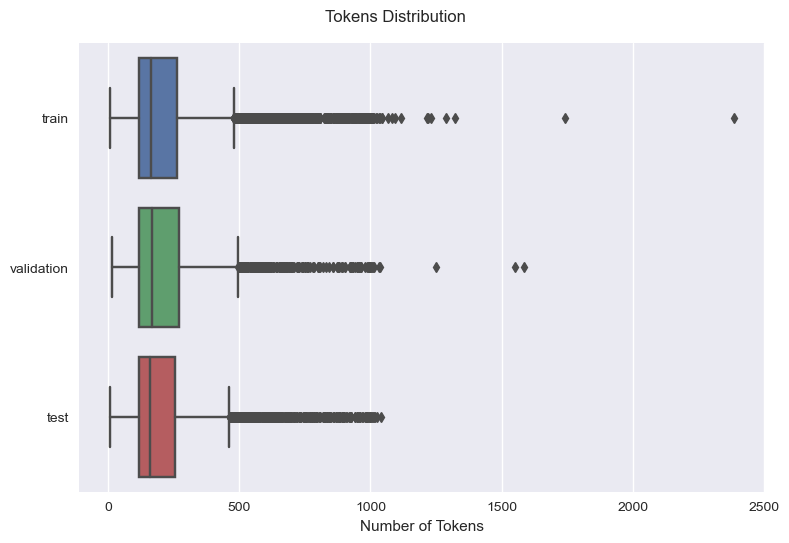

In [94]:
fig, ax = plt.subplots()

fig.suptitle("Tokens Distribution")

sns.boxplot(
    data = data_sets,
    orient = 'h',
    ax = ax
)

ax.set_yticks([0, 1, 2], names)
ax.set_xlabel("Number of Tokens")

fig.tight_layout()
plt.show()
